# **Importing Libraries**



In [0]:
import numpy as np
import sys
from scipy import linalg
from pylab import *
import pandas as pd
import matplotlib

pd.options.display.max_columns = None
np.set_printoptions(precision=15,suppress=False,threshold=sys.maxsize)

In [0]:
# parametros do teste n = tamanho da amostra, ini = x0 e fim = xn
n = 29

## Definindo os vetores com dados de tempo e espaco
t = np.arange(30)
x = np.array([0.0, 1, 2.4, 4.1, 6, 8.2, 10.6, 13.4, 16.4, 19.7,23.3, 27, 31.2, 35.5, 40.1, 45, 50.2, 55.6, 61.3, 67.3,73.6, 80.1, 86.9, 94, 101.3, 109, 116.9, 125, 133.4, 142.1])

# **Defining Functions**

In [0]:
def fum(t): 
  return 1

def fdois(t):
  return t

def ftres(t):
  return t**2

# **Defining 3x3 Array-Problem**

In [0]:

# Initializing all 0 values considering de sum on (0,29) of all values on <fx,fx>

um_um = 0
um_dois = 0
um_tres = 0

dois_um = 0
dois_dois = 0
dois_tres = 0

tres_um = 0
tres_dois = 0
tres_tres = 0

# Calculating the sum on (0,29)

for i in range(0,29):

  um_um += fum(i)*fum(i)
  um_dois += fum(i)*fdois(i)
  um_tres += fum(i)*ftres(i)

  dois_um += fdois(i)*fum(i)
  dois_dois += fdois(i)*fdois(i)
  dois_tres += fdois(i)*ftres(i)

  tres_um += ftres(i)*fum(i)
  tres_dois += ftres(i)*fdois(i)
  tres_tres += ftres(i)*ftres(i)

In [0]:
matriz_um = np.array([(um_um,um_dois,um_tres),(dois_um,dois_dois,dois_tres),(tres_um,tres_dois,tres_tres)])

In [0]:
matriz_um

array([[     29,     406,    7714],
       [    406,    7714,  164836],
       [   7714,  164836, 3756718]])

# **Defining 3x1 Array-Problem**

In [0]:
x = np.array([0.0, 1, 2.4, 4.1, 6, 8.2, 10.6, 13.4, 16.4, 19.7,23.3, 27, 31.2, 35.5, 40.1, 45, 50.2, 55.6, 61.3, 67.3,73.6, 80.1, 86.9, 94, 101.3, 109, 116.9, 125, 133.4, 142.1])

In [0]:
fum_x = 0
fdois_x = 0
ftres_x = 0

In [0]:
test = 0

for i in range(0,29):

  fum_x += fum(i)*x[i]
  fdois_x += fdois(i)*x[i]
  ftres_x += ftres(i)*x[i]

In [0]:
matriz_3 = np.array([(fum_x),(fdois_x),(ftres_x)])

In [0]:
matriz_3

array([  1438.5           ,  29815.500000000004, 668940.5           ])

# **Método de Gauss**

In [0]:
## Resolvendo por Gauss
m = len(matriz_um)

##Escalonagem da Matriz

for j in range(0,m-1):
  if(matriz_um[j,j]==0):
    for x in range(j+1,m):
      matriz_um[[x, j]] = matriz_um[[j, x]]
  ##print ("Troca de linhas\n",A)
  for i in range(j+1,m):
    multiplo = -matriz_um[i,j]/matriz_um[j,j]
    for k in range(j,m):
      matriz_um[i,k] = matriz_um[i,k]+ (multiplo*matriz_um[j,k])
    matriz_3[i]=matriz_3[i] + (multiplo*matriz_3[j])


print("Iteração",j)

## Resolvendo o Sistema para o coeficiente alfa

alfa = np.empty(m,dtype = np.float64)

for i in range(m-1,-1,-1):
  alfa[i] = matriz_3[i]
  for j in range(i+1,m):
    alfa[i]= alfa[i] - (matriz_um[i,j]*alfa[j])
  alfa[i]=alfa[i]/matriz_um[i,i]


print ("Vetor alfa", alfa)


Iteração 1
Vetor alfa [-0.048164627363898  0.970555467274074  0.135578332185673]


# **Definindo a Função de Modelo**

[-4.816462736389753e-02  1.057969172095850e+00  2.435259635926942e+00
  4.083706764129380e+00  6.003310556703163e+00  8.194071013648291e+00
  1.065598813496476e+01  1.338906192065258e+01  1.639329237071175e+01
  1.966867948514226e+01  2.321522326394411e+01  2.703292370711731e+01
  3.112178081466185e+01  3.548179458657774e+01  4.011296502286498e+01
  4.501529212352357e+01  5.018877588855349e+01  5.563341631795477e+01
  6.134921341172738e+01  6.733616716987135e+01  7.359427759238665e+01
  8.012354467927329e+01  8.692396843053129e+01  9.399554884616064e+01
  1.013382859261613e+02  1.089521796705334e+02  1.168372300792767e+02
  1.249934371523915e+02  1.334208008898775e+02  1.421000000000000e+02]


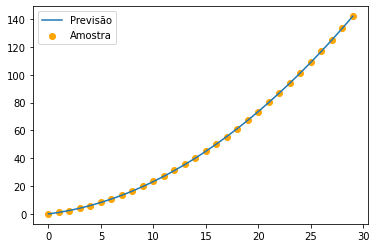

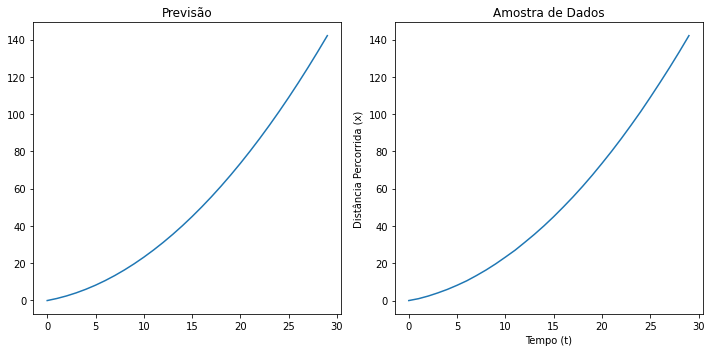

In [0]:

def fmodelo(tempo):
  modelo = alfa[0]*fum(tempo) + alfa[1]*fdois(tempo) + alfa[2]*ftres(tempo)
  return modelo

previsao = np.empty(30)

for i in range(0,29):
  previsao[i] = fmodelo(i)

print (previsao)

## Função de Previsão
matplotlib.pyplot.plot(t,previsao,label="Previsão")
x1 = t
y1 = previsao

## Amostra de Dados
matplotlib.pyplot.scatter(t,x,c="orange",label="Amostra")
x2 = t
y2 = x

matplotlib.pyplot.legend(loc="best")

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].plot(x1, y1)
axes[0].set_title("Previsão")
axes[1].plot(x2, y2)
axes[1].set_title("Amostra de Dados")
matplotlib.pyplot.ylabel("Distância Percorrida (x)")
matplotlib.pyplot.xlabel("Tempo (t)")
fig.tight_layout()


# **Verifying Runge Function Interpolation By Lagrange Method**

In [0]:
#Definindo a Função de Runge 

def fRunge(variavel):
 Runge = 1/(1+25*(variavel)**2)
 return Runge

 ## Definindo nós igualmente espaçados

def Xeq(n):
  Xeq = np.empty(n)
  for j in range(0,n):
    Xeq[j] = -1+(2*j/n)
  return Xeq


## Definindo nós de Chebyschev

def Xcheb(n):
  Xcheb = np.empty(n)
  for j in range(0,n):
    Xcheb[j] = -np.cos(j*np.pi/n)
  return Xcheb

## Definindo malha uniformemente variada de -1 ate 1 com 10117 pontos
step = 1.9772e-4
x = np.linspace(-1,1,10117)
tam = len(x)

if (tam == 10117):
  print("Tamanho Correto !")


#Definindo o Metodo de lagrange 

def Lagrange(x,X):
  saida=0
  n = len(X)
  for i in range (0,n):
    produto=1
    for j in range(0,n):
      if(i!=j):
        produto *= (x-X[j])/(X[i]-X[j])
    saida += produto*fRunge(X[i])
  return saida


## Calculando o erro dos Dois tipos de Nos
def Calcular_Erros(No):
  Errosmaximos = []

  for n in range (2,51):
    erros = []
    erro = []
    p = lambda x: Lagrange(x,No(n))
    for i in range(len(x)):
      erro = abs( fRunge(x[i]) - p(x[i]) )
      erros.append(erro)
    erromax = max(erros)
    Errosmaximos.append(erromax)
    print(Errosmaximos)

  return(Errosmaximos)

n = np.arange(2,51)

Erro_Espacado = []
Erro_Cheb = []

Erro_Espacado = Calcular_Erros(Xeq)
Erro_Cheb = Calcular_Erros(Xcheb)

Tamanho Correto !
[1.923076923076923]
[1.923076923076923, 0.7070135746606335]
[1.923076923076923, 0.7070135746606335, 4.973474801061007]
[1.923076923076923, 0.7070135746606335, 4.973474801061007, 0.4326923076923076]
[1.923076923076923, 0.7070135746606335, 4.973474801061007, 0.4326923076923076, 12.97272614056208]
[1.923076923076923, 0.7070135746606335, 4.973474801061007, 0.4326923076923076, 12.97272614056208, 0.24735860655931485]
[1.923076923076923, 0.7070135746606335, 4.973474801061007, 0.4326923076923076, 12.97272614056208, 0.24735860655931485, 33.03150327088641]
[1.923076923076923, 0.7070135746606335, 4.973474801061007, 0.4326923076923076, 12.97272614056208, 0.24735860655931485, 33.03150327088641, 0.30029768123105155]
[1.923076923076923, 0.7070135746606335, 4.973474801061007, 0.4326923076923076, 12.97272614056208, 0.24735860655931485, 33.03150327088641, 0.30029768123105155, 82.0995475113122]
[1.923076923076923, 0.7070135746606335, 4.973474801061007, 0.4326923076923076, 12.97272614056

Text(0.5, 0, 'n')

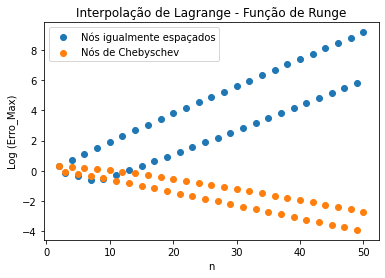

In [0]:
#Plotando os Erros em Escala Log

matplotlib.pyplot.scatter(n,np.log10(Erro_Espacado),label ="Nós igualmente espaçados")
matplotlib.pyplot.scatter(n,np.log10(Erro_Cheb),label ="Nós de Chebyschev")
matplotlib.pyplot.ylabel("Log (Erro_Max)")
matplotlib.pyplot.legend(loc="best")
matplotlib.pyplot.title("Interpolação de Lagrange - Função de Runge")
matplotlib.pyplot.xlabel("n")


In [0]:
## Tabela com os Erros de Cada nó 

pd.set_option('precision', 15)

df = pd.DataFrame(data=[Erro_Espacado,Erro_Cheb],index=["Erro Nós igualmente espaçados","Erro Nós de Chebyschev"],columns=np.arange(2,51))
df = df.filter(items=[10,20,30,40,50])
df_transposed = df.T
df_transposed

,Erro Nós igualmente espaçados,Erro Nós de Chebyschev
10,8.209954751131220e+01,1.096267131066521
20,6.329891137757362e+03,0.295091361434017
30,4.201152176317928e+05,0.060673200240891
40,2.623664950890799e+07,0.011092581329762
50,1.585224639690690e+09,0.001901263873124


# **Verifying Sin Function Interpolation By Lagrange Method**

In [0]:
def fsin (variavel):
  Sin = np.sin(variavel)
  return Sin

 ## Definindo nós igualmente espaçados

def Xeq(n):
  Xeq = np.empty(n)
  for j in range(0,n):
    Xeq[j] = -1+(2*j/n)
  return Xeq

## Definindo nós de Chebyschev

def Xcheb(n):
  Xcheb = np.empty(n)
  for j in range(0,n):
    Xcheb[j] = -np.cos(j*np.pi/n)
  return Xcheb

## Definindo malha uniformemente variada de -1 ate 1 com 10117 pontos
step = 1.9772e-4
x = np.linspace(-1,1,10117)
tam = len(x)

In [0]:
#Definindo o Metodo de lagrange 

def Lagrange(x,X):
  saida=0
  n = len(X)
  for i in range (0,n):
    produto=1
    for j in range(0,n):
      if(i!=j):
        produto *= (x-X[j])/(X[i]-X[j])
    saida += produto*fsin(X[i])
  return saida

## Calculando o erro dos Dois tipos de Nos
def Calcular_Erros(No):
  Errosmaximos = []

  for n in range (2,51):
    erros = []
    erro = []
    p = Lagrange(x,No(n))
    for i in range(len(x)):
      erro = abs( fsin(x[i]) - p[i] )
      erros.append(erro)
    erromax = max(erros)
    Errosmaximos.append(erromax)
    print(Errosmaximos)

  return(Errosmaximos)

##Erro da funcao Seno
n = np.arange(2,51)

Erro_Espacado_sin = []
Erro_Cheb_sin = []

Erro_Espacado_sin = Calcular_Erros(Xeq)
Erro_Cheb_sin = Calcular_Erros(Xcheb)

[0.059993758553867516]
[0.059993758553867516, 0.28022621116112045]
[0.059993758553867516, 0.28022621116112045, 0.0009031432233586045]
[0.059993758553867516, 0.28022621116112045, 0.0009031432233586045, 0.009903851566663624]
[0.059993758553867516, 0.28022621116112045, 0.0009031432233586045, 0.009903851566663624, 8.415077161871842e-06]
[0.059993758553867516, 0.28022621116112045, 0.0009031432233586045, 0.009903851566663624, 8.415077161871842e-06, 0.00015176663373694943]
[0.059993758553867516, 0.28022621116112045, 0.0009031432233586045, 0.009903851566663624, 8.415077161871842e-06, 0.00015176663373694943, 5.0544921359474415e-08]
[0.059993758553867516, 0.28022621116112045, 0.0009031432233586045, 0.009903851566663624, 8.415077161871842e-06, 0.00015176663373694943, 5.0544921359474415e-08, 1.2973034457797183e-06]
[0.059993758553867516, 0.28022621116112045, 0.0009031432233586045, 0.009903851566663624, 8.415077161871842e-06, 0.00015176663373694943, 5.0544921359474415e-08, 1.2973034457797183e-06, 2

Text(0.5, 0, 'n')

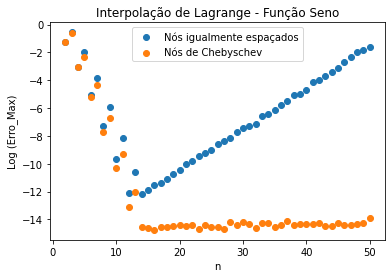

In [0]:
#Plotando os Erros em Escala Log

matplotlib.pyplot.scatter(n,np.log10(Erro_Espacado_sin),label ="Nós igualmente espaçados")
matplotlib.pyplot.scatter(n,np.log10(Erro_Cheb_sin),label ="Nós de Chebyschev")
matplotlib.pyplot.ylabel("Log (Erro_Max)")
matplotlib.pyplot.legend(loc="best")
matplotlib.pyplot.title("Interpolação de Lagrange - Função Seno")
matplotlib.pyplot.xlabel("n")

In [0]:
## Tabela com os Erros de Cada nó 


pd.set_option('precision', 15)

df2 = pd.DataFrame(data=[Erro_Espacado_sin,Erro_Cheb_sin],index=["Erro Nós igualmente espaçados","Erro Nós de Chebyschev"],columns=np.arange(2,51))
df2 = df2.filter(items=[10,20,30,40,50])
df2_transposed = df2.T
df2_transposed

,Erro Nós igualmente espaçados,Erro Nós de Chebyschev
10,0.000000000209572,0.000000000047405
20,0.000000000033450,0.000000000000004
30,0.000000037777574,0.000000000000006
40,0.000020338386496,0.000000000000005
50,0.022562802185869,0.000000000000012


# **Comparing Newton and Lagrange Interpolation for Sin Funtion**

In [0]:
## Achando os Coefientes do Polinomio de Newton pelo Metodo das Diferencas Divididas

def Newton_Interpol(No, funcao):
    tamanho = len(No)
    dimensao = (tamanho,tamanho)
    M = np.zeros(dimensao,dtype = np.float64)
    M[::,0] = funcao 
    for j in range(1,n):
        for i in range(n-j):
            M[i][j] = (M[i+1][j-1] - M[i][j-1]) / (No[i+j] - No[i])
    return M[0] 

## Construindo Polinomio de Newton a partir dos Coeficientes encontrados anteriormente
def poliNewton(x,No,M):
  n = len(No)
  saida2 = M[n-1]
  for i in range(n-2,-1,-1):
    saida2 = saida2*(x-No[i]) + M[i]
  return saida2

## Calculando o erro das Iteracoes do Metodo de Newton
Errosmaximos_newton = []

for n in range (2,101):
  erros_newton = []
  erro_newton = []
  M = Newton_Interpol(Xcheb(n),fsin(Xcheb(n)))
  pNewton = poliNewton(x,Xcheb(n),M)
  for i in range(len(x)):
    erro_newton = abs( fsin(x[i]) - pNewton[i] )
    erros_newton.append(erro_newton)
  erromax_newton = max(erros_newton)
  Errosmaximos_newton.append(erromax_newton)
  print(Errosmaximos_newton)

n2 = np.arange(2,101)

## Calculando o erro dos Dois tipos de Nos
def Calcular_Erros(No):
  Errosmaximos = []

  for n in range (2,101):
    erros = []
    erro = []
    p = Lagrange(x,No(n))
    for i in range(len(x)):
      erro = abs( fsin(x[i]) - p[i])
      erros.append(erro)
    erromax = max(erros)
    Errosmaximos.append(erromax)
    print(Errosmaximos)

  return(Errosmaximos)

##Erro da funcao Seno até 100 nos

Erro_Cheb_sin_100 = []

Erro_Cheb_sin_100 = Calcular_Erros(Xcheb)

[0.05999375855386757]
[0.05999375855386757, 0.234760184801019]
[0.05999375855386757, 0.234760184801019, 0.0009302853260387822]
[0.05999375855386757, 0.234760184801019, 0.0009302853260387822, 0.004995154604224172]
[0.05999375855386757, 0.234760184801019, 0.0009302853260387822, 0.004995154604224172, 5.825332017261875e-06]
[0.05999375855386757, 0.234760184801019, 0.0009302853260387822, 0.004995154604224172, 5.825332017261875e-06, 4.206512288806863e-05]
[0.05999375855386757, 0.234760184801019, 0.0009302853260387822, 0.004995154604224172, 5.825332017261875e-06, 4.206512288806863e-05, 2.063993104206574e-08]
[0.05999375855386757, 0.234760184801019, 0.0009302853260387822, 0.004995154604224172, 5.825332017261875e-06, 4.206512288806863e-05, 2.063993104206574e-08, 1.8897300635423164e-07]
[0.05999375855386757, 0.234760184801019, 0.0009302853260387822, 0.004995154604224172, 5.825332017261875e-06, 4.206512288806863e-05, 2.063993104206574e-08, 1.8897300635423164e-07, 4.740502435041094e-11]
[0.0599937

Text(0.5, 0, 'n')

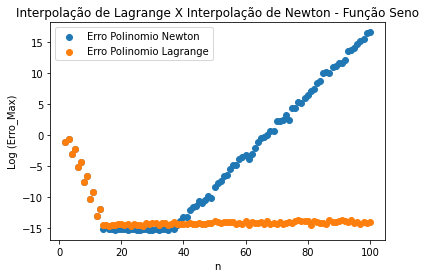

In [0]:
## Plotando os erros do polinomio de Newton VS Polinomio de Lagrange, ambos com nos de Chersbychev
matplotlib.pyplot.scatter(n2,np.log10(Errosmaximos_newton),label ="Erro Polinomio Newton")
matplotlib.pyplot.scatter(n2,np.log10(Erro_Cheb_sin_100),label ="Erro Polinomio Lagrange")
matplotlib.pyplot.ylabel("Log (Erro_Max)")
matplotlib.pyplot.legend(loc="best")
matplotlib.pyplot.title("Interpolação de Lagrange X Interpolação de Newton - Função Seno")
matplotlib.pyplot.xlabel("n")

In [0]:
## Tabela com os Erros de Cada Metodo

pd.set_option('precision', 15)

df3 = pd.DataFrame(data=[Errosmaximos_newton,Erro_Cheb_sin_100],index=["Erro Pol Newton","Erro Pol Lagrange"],columns=np.arange(2,101))
df3 = df3.filter(items=[10,20,30,40,50,60,70,80,90,100])
df3_transposed = df3.T
df3_transposed

,Erro Pol Newton,Erro Pol Lagrange
10,4.740502435041094e-11,0.000000000047405
20,6.661338147750939e-16,0.000000000000004
30,4.440892098500626e-16,0.000000000000006
40,5.129230373768223e-14,0.000000000000005
50,3.954299998554234e-09,0.000000000000012
60,5.255116389214498e-04,0.000000000000010
70,1.631181969937952e+02,0.000000000000004
80,2.446972490374596e+06,0.000000000000012
90,3.922806662040026e+11,0.000000000000013
100,3.433885607720958e+16,0.000000000000008


# **Defining Simpson and Trapeze Methods**

In [0]:
## Definindo a função de estudo (exponencial)

def f(x):
  return np.exp(x)

## Definindo a Regra do trapézio

def Trapezio(n):

  h = 1/n
  somatorio_xi = 0
  x_i = np.empty(n)

  for j in range(0,n):
    x_i[j] = j*h
  
  for i in range(1,n-1):
     somatorio_xi += 2*f(x_i[i]) 
     
  trapezio = h/2 * (f(x_i[0]) + somatorio_xi + f(x_i[n-1]))   
  return trapezio

## Definindo a Regra de Simpson

def simpson(n):

  coeficiente = 0
  h = 1/n
  x_i = np.empty(n)
  somatorio = 0

  for j in range(0,n):
    x_i[j] = j*h

  for i in range(1,n-1):

    if (i%2==0):
      coeficiente = 2
    else:
      coeficiente = 4

    somatorio += coeficiente*f(x_i[i])

  s = ( somatorio + f(x_i[0]) + f(x_i[n-1]) ) * h/3
  return s


# **Verifying Integral Convergence on Trapeze Method**

Text(0.5, 0, 'Log (h)')

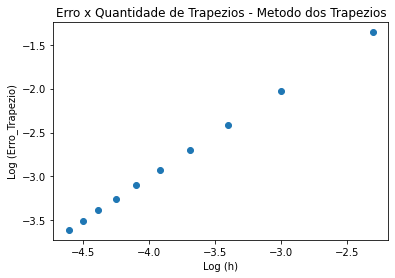

In [0]:
# Definindo a array de valores de n
n = np.linspace(10,100,10,dtype=int)

# Erro do Trapézio 

integral_f_x = np.exp(1) - np.exp(0)
integrais_t = []

for i in n:
  valor = abs(integral_f_x - Trapezio(i)) 
  integrais_t.append(valor)

integrais_t

## Defenindo os H`s do intervalo 
agas = []

for i in n:
  agas.append(1/i)

def e_n(mi,x,p):
  return (mi*x)**p

#angular = ( np.log(integrais_t[len(n)-1]) - np.log(integrais_t[0]) )/( np.log(agas[len(n)-1]) - np.log(agas[0]) )
#print(angular)

# Plot dos Valores alinhados de log_h e log_integrais proximos de uma reta

log_agas = np.log(agas)
log_integrais_t = np.log(integrais_t)

scatter(log_agas,log_integrais_t)
matplotlib.pyplot.ylabel("Log (Erro_Trapezio)")
matplotlib.pyplot.title("Erro x Quantidade de Trapezios - Metodo dos Trapezios")
matplotlib.pyplot.xlabel("Log (h)")


In [0]:
## Encontrando os Coeficientes da reta  
from scipy.optimize import curve_fit

a_popt,a_pcov = curve_fit(e_n,agas,integrais_t)

## coeficientes
mi_t , p_t = a_popt

##erro dos coeficientes
erro_mi_t,erro_p_t = np.sqrt(np.diag(a_pcov))

print("mi = %6.6f +- %6.6f\np = %6.6f +- %6.6f"%(mi_t,erro_mi_t,p_t,erro_p_t))

mi = 2.482386 +- 0.011107
p = 0.972796 +- 0.002270


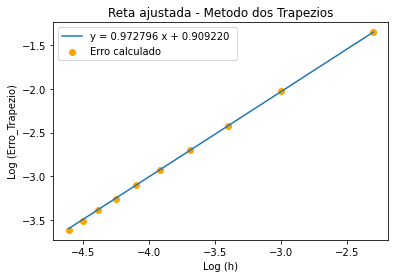

In [0]:
## Plotando Valores encontrados na Reta Ajustada

valores_et_n = []

for i in agas:
  valores_et_n.append(e_n(mi_t,i,p_t))

plt.plot(np.log(agas),np.log(valores_et_n), label ="y = %6.6f x + %6.6f "%(p_t,np.log(mi_t)))
scatter(np.log(agas),np.log(integrais_t), label = "Erro calculado", c = "orange")
matplotlib.pyplot.ylabel("Log (Erro_Trapezio)")
matplotlib.pyplot.title("Reta ajustada - Metodo dos Trapezios")
matplotlib.pyplot.xlabel("Log (h)")
matplotlib.pyplot.legend(loc="best")



# **Verifying Integral Convergence on Simpson Method**

Text(0.5, 0, 'Log (h)')

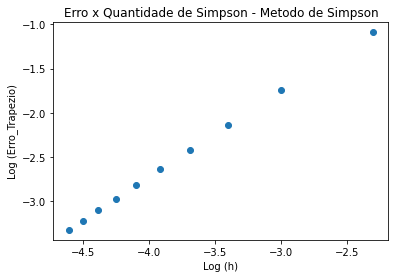

In [0]:
# Definindo a array de valores de n
n = np.linspace(10,100,10,dtype=int)

# Erro do Trapézio 

integrais_s = []

for i in n:
  valor = abs(integral_f_x - simpson(i)) 
  integrais_s.append(valor)

integrais_s

# Plot dos Valores alinhados de log_h e log_integrais proximos de uma reta

scatter(np.log(agas),np.log(integrais_s))
matplotlib.pyplot.ylabel("Log (Erro_Trapezio)")
matplotlib.pyplot.title("Erro x Quantidade de Simpson - Metodo de Simpson")
matplotlib.pyplot.xlabel("Log (h)")

In [0]:
## Encontrando os Coeficientes da reta  
from scipy.optimize import curve_fit

a_popt,a_pcov = curve_fit(e_n,agas,integrais_s)

## coeficientes
mi_s , p_s = a_popt

##erro dos coeficientes
erro_mi_s,erro_p_s = np.sqrt(np.diag(a_pcov))

print("mi = %6.6f +- %6.6f\np = %6.6f +- %6.6f"%(mi_s,erro_mi_s,p_s,erro_p_s))

mi = 3.234254 +- 0.017534
p = 0.962947 +- 0.003110


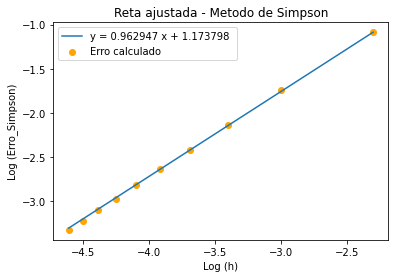

In [0]:
## Plotando Valores encontrados na Reta Ajustada

valores_es_n = []

for i in agas:
  valores_es_n.append(e_n(mi_s,i,p_s))

plt.plot(np.log(agas),np.log(valores_es_n), label ="y = %6.6f x + %6.6f "%(p_s,np.log(mi_s)))
scatter(np.log(agas),np.log(integrais_s), label = "Erro calculado", c = "orange")
matplotlib.pyplot.ylabel("Log (Erro_Simpson)")
matplotlib.pyplot.title("Reta ajustada - Metodo de Simpson")
matplotlib.pyplot.xlabel("Log (h)")
matplotlib.pyplot.legend(loc="best")


In [0]:
## Comparando o erro de cada Método para valores de log(h)

pd.set_option('precision', 15)
df4 = pd.DataFrame(data=[np.log(integrais_t),np.log(integrais_s)],index=["Log(Erro Trapézio)","Log(Erro Simpson)"],columns = np.log(agas))
df4_transposed = df4.T
df4_transposed

,Log(Erro Trapézio),Log(Erro Simpson)
-2.302585092994045,-1.356880874094226,-1.088952835961774
-2.995732273553991,-2.023123011830688,-1.745314221015107
-3.401197381662155,-2.419511880609035,-2.138410665081215
-3.688879454113936,-2.702635585427170,-2.419888586089572
-3.912023005428146,-2.923037634939990,-2.639303329523059
-4.094344562222100,-3.103528822969633,-2.819136388188635
-4.248495242049359,-3.256370773534480,-2.971508284907315
-4.382026634673881,-3.388919895653836,-3.103704888483671
-4.499809670330265,-3.505938514346605,-3.220449339362407
-4.605170185988091,-3.610687226285607,-3.324978725574778
